## Import Packages

In [1]:
import numpy as np
import keras
import cv2
import pandas as pd
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, GRU, Flatten,Merge
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import os
import tensorflow as tf
import imutils
import dlib
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler



Using TensorFlow backend.
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the mo

## Load the Dataset

In [2]:
def get_value(data):
    arr_row = []
    for i in range(len(data)):
        row = data[i]
        pt1 = row[1] + (row[3] - row[1])/2
        pt2 = row[2] + (row[4] - row[2])/2
        temp =[int(pt1), int(pt2)]
        arr_row.append(temp)
        
    return np.array(arr_row)

In [3]:
def get_features(folder,n):
    arr_X_lefteye = []; 
    arr_X_righteye = []; 
    arr_X_face_features = []

    arr_Y =[]
    
    for i in range(112):

        filenameX = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/sample"+str(i+1)
        filenameX_face_points = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_points/sample_"+str(i+1)
        filenameY= "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/original_road_view/sample_"+str(i+1)+".npy"
        
        if(os.path.exists("/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/") and os.path.exists(filenameY)
          and os.path.exists(filenameX +"_left_eye_data.npy") and os.path.exists(filenameX +"_right_eye_data.npy")
          and os.path.exists(filenameX +"_headpose_pupil.npy")):
            
            x_lefteye = np.load(filenameX +"_left_eye_data.npy")
            x_righteye = np.load(filenameX +"_right_eye_data.npy")
            x_face_features = np.load(filenameX +"_headpose_pupil.npy")
            x_face_points = np.load(filenameX_face_points +"_face_points.npy")
            #print(i)
            y = np.load(filenameY)

            if(y.shape[0]>=50):
                
                arr_X_lefteye.append(x_lefteye[:50])
                arr_X_righteye.append(x_righteye[:50])
                arr_X_face_features.append(np.concatenate((x_face_features[:50], x_face_points[:50]),axis =1))
      
                if(i>=9):
                    arr_Y.append(get_value(y[:50,:]))
                else: 
                    arr_Y.append(y[:50,:])

   # print(np.array(arr_X_lefteye).shape, np.array(arr_X_righteye).shape, np.array(arr_X_face_features).shape, np.array(arr_Y).shape)
    return np.array(arr_X_lefteye), np.array(arr_X_righteye), np.array(arr_X_face_features), np.array(arr_Y)

            

In [4]:
def get_data(users):
    for i in range(len(users)):

        print(i)
        left_eye, right_eye, face_features, Yground_truth = get_features(users[i], 50)

        print(left_eye.shape, right_eye.shape, face_features.shape, Yground_truth.shape)

        if(i == 0):
            left_eye_data = left_eye
            right_eye_data = right_eye
            face_features_data = face_features
            Ydata = Yground_truth

        else:
            left_eye_data = np.concatenate((left_eye_data, left_eye), axis = 0)
            right_eye_data = np.concatenate((right_eye_data, right_eye), axis = 0)
            face_features_data = np.concatenate((face_features_data, face_features), axis = 0)
            Ydata = np.concatenate((Ydata, Yground_truth), axis = 0)

    return left_eye_data, right_eye_data, face_features_data, Ydata

In [5]:
users = [2,3,5,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
left_eye_data, right_eye_data, face_features_data,Ydata = get_data(users)
print(left_eye_data.shape, right_eye_data.shape, face_features_data.shape,Ydata.shape)

0
(0,) (0,) (0,) (0,)
1
(0,) (0,) (0,) (0,)
2
(0,) (0,) (0,) (0,)
3
(0,) (0,) (0,) (0,)
4
(0,) (0,) (0,) (0,)
5
(0,) (0,) (0,) (0,)
6
(0,) (0,) (0,) (0,)
7
(0,) (0,) (0,) (0,)
8
(0,) (0,) (0,) (0,)
9
(0,) (0,) (0,) (0,)
10
(0,) (0,) (0,) (0,)
11
(0,) (0,) (0,) (0,)
12
(0,) (0,) (0,) (0,)
13
(0,) (0,) (0,) (0,)
14
(0,) (0,) (0,) (0,)
15
(0,) (0,) (0,) (0,)
16
(0,) (0,) (0,) (0,)
17
(0,) (0,) (0,) (0,)
18
(0,) (0,) (0,) (0,)
19
(0,) (0,) (0,) (0,)
(0,) (0,) (0,) (0,)


## Convert video data into images

In [6]:
left_eye_data2 = left_eye_data.reshape((left_eye_data.shape[0]*left_eye_data.shape[1], 
                                         left_eye_data.shape[2],left_eye_data.shape[3],
                                         left_eye_data.shape[4]))

right_eye_data2 = right_eye_data.reshape((right_eye_data.shape[0]*right_eye_data.shape[1], 
                                         right_eye_data.shape[2],right_eye_data.shape[3],
                                         right_eye_data.shape[4]))

face_features_data2 = face_features_data.reshape((face_features_data.shape[0]*face_features_data.shape[1], 
                                         face_features_data.shape[2]))

Ydata2 = Ydata.reshape((Ydata.shape[0]*Ydata.shape[1], 
                                         Ydata.shape[2]))

print(left_eye_data2.shape, right_eye_data2.shape, face_features_data2.shape, Ydata2.shape)

IndexError: tuple index out of range

## Divide the data into Train and Val

1.  Train = 80% of total dataset 
    - For images
       1. left_eye_data2
       2. right_eye_data2
       3. face_features_data2
       4. Ydata2
       
    - For videos
    
2.  val = 20% of the dataset
3. Test = left_eye10, right_eye10, face_features10, Y10

In [ ]:
from random import shuffle

idx = np.arange(0,len(Ydata2))
shuffle(idx)

train_len = int((90 * len(Ydata2))/100)

train_idx = idx[:train_len]
#val_idx = idx[train_len:len(Ydata2)]
val_idx = idx[train_len:train_len+int((len(Ydata2)-train_len)/2)]
test_idx = idx[train_len+int((len(Ydata2)-train_len)/2):len(Ydata2)]

print(len(train_idx),len(val_idx), len(test_idx))

In [ ]:
train_left_eye_data = left_eye_data2[train_idx]
train_right_eye_data = right_eye_data2[train_idx]
train_face_features_data = face_features_data2[train_idx] 
train_Ydata = Ydata2[train_idx]

val_left_eye_data = left_eye_data2[val_idx]
val_right_eye_data = right_eye_data2[val_idx]
val_face_features_data = face_features_data2[val_idx] 
val_Ydata = Ydata2[val_idx]

test_left_eye_data = left_eye_data2[test_idx]
test_right_eye_data = right_eye_data2[test_idx]
test_face_features_data = face_features_data2[test_idx] 
test_Ydata = Ydata2[test_idx]


# test_left_eye_data = left_eye10.reshape((left_eye10.shape[0]*left_eye10.shape[1], 
#                                          left_eye10.shape[2],left_eye10.shape[3],
#                                          left_eye10.shape[4]))  

# test_right_eye_data = right_eye10.reshape((right_eye10.shape[0]*right_eye10.shape[1], 
#                                          right_eye10.shape[2],right_eye10.shape[3],
#                                          right_eye10.shape[4]))  

# test_face_features_data = face_features10.reshape((face_features10.shape[0]*face_features10.shape[1], 
#                                          face_features10.shape[2]))

# test_Ydata = Y10.reshape((Y10.shape[0]*Y10.shape[1], 
#                                          Y10.shape[2]))


In [ ]:
print(train_left_eye_data.shape, train_right_eye_data.shape, train_face_features_data.shape, train_Ydata.shape)

In [ ]:
print(train_face_features_data[0])
### 0. Frame no
### 1,2,3. Headpose(1,2,3)
### 4,5 Left eye location
### 6,7 Right Eye Location
### 8 Face Area
### 9,10 Nose location

print(np.concatenate((train_face_features_data[0,1:8], train_face_features_data[0,9:11])))

## Train Model

In [ ]:
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),activation='relu',input_shape=(36,60,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(50, (3, 3), activation='relu'))
# model.add(Dropout(0.5))
model.add(Conv2D(50, (3, 3), activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Flatten())
inputs = Input(shape=(10,))
#model2= model

model3 = Sequential()
model3.add(Dense(16, activation ='relu', input_dim=(14)))

model2 = Sequential()
model2.add(Merge([model, model3], mode = 'concat'))

model2.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model2.add(Dense(500))
model2.add(Dense(2))
print(model2.summary())

In [ ]:
model2.compile(loss='mae', optimizer='adam')

In [42]:

earlystopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 1, patience =5, verbose =0, mode ='auto')

history = model2.fit([train_left_eye_data, np.concatenate((train_face_features_data[:,1:8],train_face_features_data[:,8:15]), axis =1)], train_Ydata, 
                     epochs=300, batch_size=40, callbacks=[earlystopping], validation_data=([val_left_eye_data,
                     np.concatenate((val_face_features_data[:,1:8],val_face_features_data[:,8:15]),axis = 1)],val_Ydata), verbose=1, shuffle= True)
print(history.history.keys())

Train on 90585 samples, validate on 5032 samples
Epoch 1/300
90585/90585 [==============================] - 12s 131us/step - loss: 191.1210 - val_loss: 172.8386
Epoch 2/300
90585/90585 [==============================] - 11s 122us/step - loss: 155.8510 - val_loss: 145.2216
Epoch 3/300
90585/90585 [==============================] - 11s 122us/step - loss: 146.3977 - val_loss: 151.7820
Epoch 4/300
90585/90585 [==============================] - 11s 122us/step - loss: 139.4211 - val_loss: 141.7675
Epoch 5/300
90585/90585 [==============================] - 11s 122us/step - loss: 133.6070 - val_loss: 129.4148
Epoch 6/300
90585/90585 [==============================] - 11s 122us/step - loss: 127.6117 - val_loss: 131.2057
Epoch 7/300
90585/90585 [==============================] - 11s 122us/step - loss: 122.6240 - val_loss: 121.2559
Epoch 8/300
90585/90585 [==============================] - 11s 123us/step - loss: 118.6707 - val_loss: 117.4212
Epoch 9/300
90585/90585 [==============================

dict_keys(['val_loss', 'loss'])


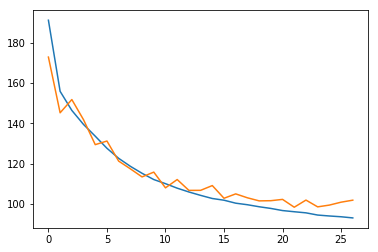

In [43]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [44]:
from sklearn.metrics import mean_absolute_error

def compute_error(left_eye_data, face_features_data, Ydata):
    y_true = Ydata
#     y_pred = model2.predict([left_eye_data, face_features_data[:,1:]]).astype(int)
#     error = rmse(y_true, y_pred)
#     print(error)
#     return error
    scores = model2.evaluate([left_eye_data, np.concatenate((face_features_data[:,1:8],face_features_data[:,8:15]),axis = 1)], Ydata)
    return scores

In [62]:
train_error = compute_error(train_left_eye_data, train_face_features_data, train_Ydata)
val_error = compute_error(val_left_eye_data, val_face_features_data, val_Ydata)
test_error = compute_error(test_left_eye_data, test_face_features_data, test_Ydata)
    
print("Train Error ==> ", train_error)
print("Val Error ==> ",  val_error)
print("Test Error ==> " ,test_error)

5033/5033 [==============================] - 0s 57us/step
Train Error ==>  92.75168621031438
Val Error ==>  101.86804537629095
Test Error ==>  103.02145323288173


## Plot dataset

In [18]:
def plot_data2(folder, i, model2, n):
    
    filenameX = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/sample"+str(i+1)
    filenameX_face_points = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_points/sample_"+str(i+1)
    filenameY= "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/original_road_view/sample_"+str(i+1)+".npy"
        
        
    video = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/original_road_view/sample_"+str(i+1)+".avi"
    driver_video = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/driver_view/sample_"+str(i+1)+".avi"
    
#     folderX = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/sample"+str(i+1)
    
#     folderY = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/original_road_view/sample_"+str(i+1)+".npy"
        
    leye = filenameX +"_left_eye_data.npy"
    reye = filenameX +"_right_eye_data.npy"
    headpose_pupil = filenameX +"_headpose_pupil.npy"
    face_points = filenameX_face_points +"_face_points.npy"

    if(os.path.exists(filenameY) and os.path.exists(leye) and os.path.exists(reye) and 
       os.path.exists(headpose_pupil) and os.path.exists(video)):
    
        x_lefteye = np.load(leye)
        x_righteye = np.load(reye)
        x_face_features = np.load(headpose_pupil)
        x_face_points = np.load(face_points)
        y = np.load(filenameY)
            
        if(y.shape[0] >= n):
           # print(i,'y')
            arrX_lefteye = x_lefteye[:n]
            arrX_righteye = x_righteye[:n]
            arrX_face_features = np.concatenate((x_face_features[:50], x_face_points[:50]),axis =1)
            
            if(i >= 9):
                arrY = get_value(y[:n,:])
            else:
                arrY = y[:n,:]
        
            # print(arrX_lefteye.shape, arrX_righteye.shape, arrX_face_features.shape)
            y_pred = model2.predict([arrX_lefteye, np.concatenate((arrX_face_features[:,1:8], arrX_face_features[:,8:15]), axis=1).astype(int)])
        
          #  print(arrY.shape, y_pred.shape)
            cap1 = cv2.VideoCapture(video)###### driver ###################
            cap2 = cv2.VideoCapture(driver_video)###### driver ###################
            

            for i in range(int(n/2)):
                ret,frame = cap1.read()
                ret1, frame1 = cap2.read()
                
           # frame_array = np.concatenate((frame1, frame), axis =1)
            frame_array = frame1
            cv2.circle(frame,(arrY[int(n/2),0], arrY[int(n/2),1]), 70, (0,255,0), -1 )
            frame_array =  np.concatenate((frame_array, frame), axis =1)
            cv2.circle(frame,(y_pred[int(n/2),0], y_pred[int(n/2),1]), 70, (0,0,255), -1 )
            frame_array =  np.concatenate((frame_array, frame), axis =1)
            
            cap1 = cv2.VideoCapture(video)###### driver ###################
            cap2 = cv2.VideoCapture(driver_video)###### driver ###################
            
            ret,frame = cap1.read()
            
            for j in range(n):
                cv2.circle(frame,(arrY[j,0], arrY[j,1]), 70, (0,255,0), -1 )
                cv2.circle(frame,(y_pred[j,0], y_pred[j,1]), 70, (0,0,255), -1 )
 
            frame_array =  np.concatenate((frame_array, frame), axis =1)
    
                
#             plt.figure(figsize=(20,10))
#             plt.imshow(frame_array)
#             plt.show()
    
    
    
            model2.fit([arrX_lefteye[:1000], np.concatenate((arrX_face_features[:1000,1:8],arrX_face_features[:1000,8:15]), axis =1)],arrY, 
                     epochs=20, batch_size=40, verbose=0, shuffle= True)
            
            y_pred = model2.predict([arrX_lefteye, np.concatenate((arrX_face_features[:,1:8], arrX_face_features[:,8:15]), axis=1).astype(int)])
        
            
          #  print(arrY.shape, y_pred.shape)
            cap1 = cv2.VideoCapture(video)###### driver ###################
            cap2 = cv2.VideoCapture(driver_video)###### driver ###################
            
            ret,frame = cap1.read()
            
            for j in range(n):
                cv2.circle(frame,(arrY[j,0], arrY[j,1]), 70, (0,255,0), -1 )
                cv2.circle(frame,(y_pred[j,0], y_pred[j,1]), 70, (0,0,255), -1 )
 
            frame_array =  np.concatenate((frame_array, frame), axis =1)
            frame_array = cv2.resize(frame_array, (int(frame_array.shape[1]/4), int(frame_array.shape[0]/4)))
            print(frame_array.shape)
                
            plt.figure(figsize=(20,10))
            plt.axis('off')
            plt.imshow(frame_array)
            plt.show()
    
    
            

            return frame_array
    


(270, 2280, 3)


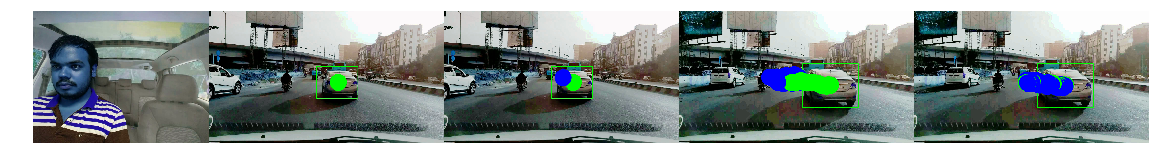

(270, 2280, 3)


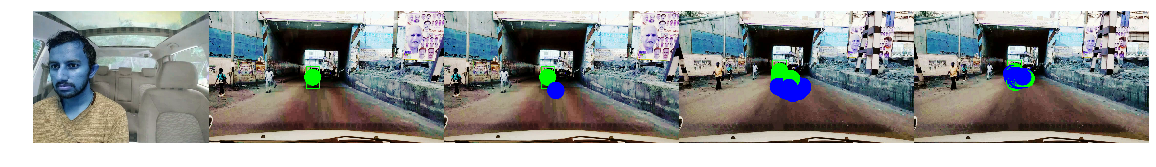

(270, 2280, 3)


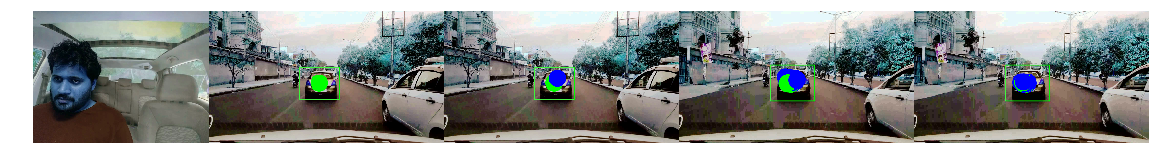

(270, 2280, 3)


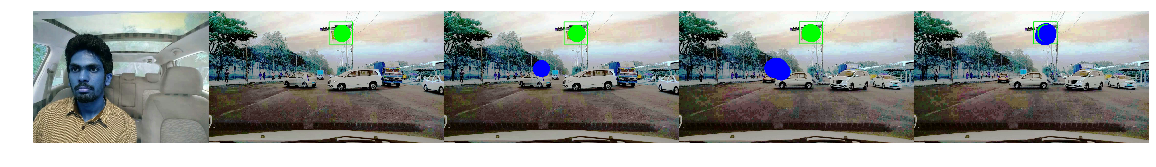

(270, 2280, 3)


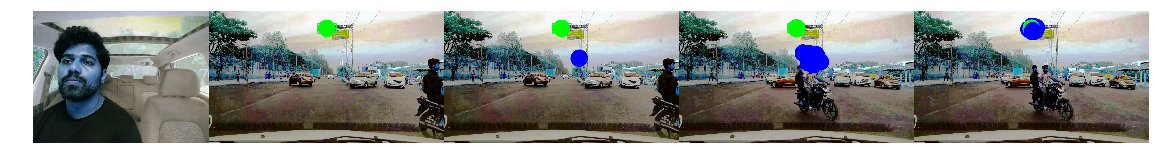

(270, 2280, 3)


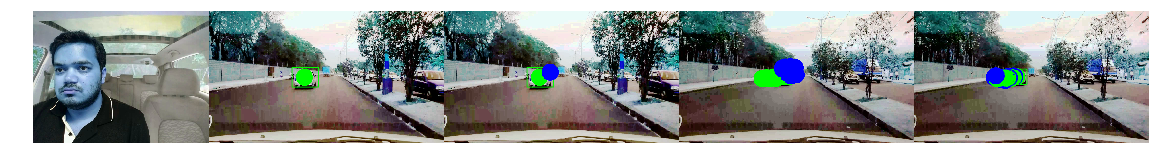

(270, 2280, 3)


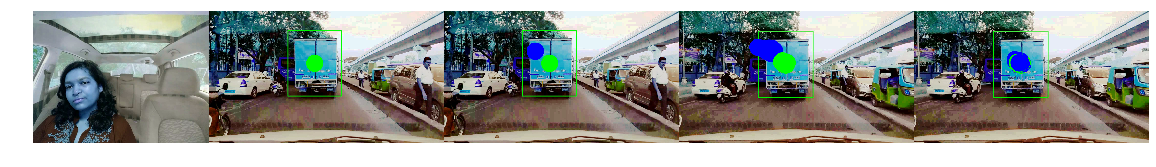

(270, 2280, 3)


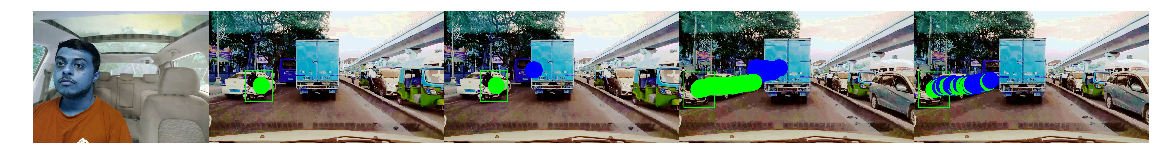

(270, 2280, 3)


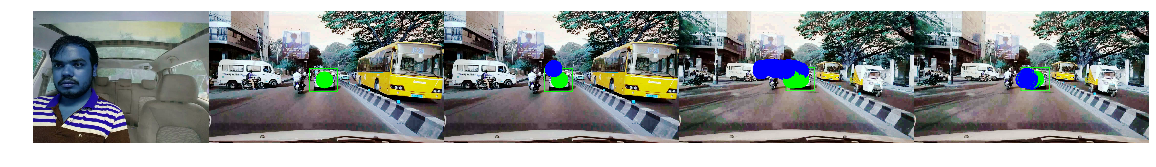

(270, 2280, 3)


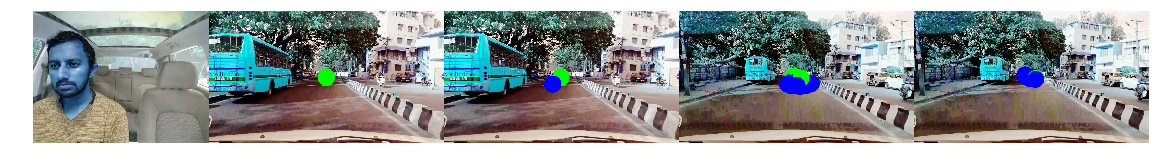

(270, 2280, 3)


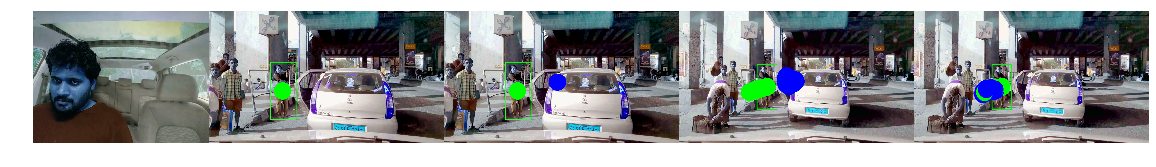

(270, 2280, 3)


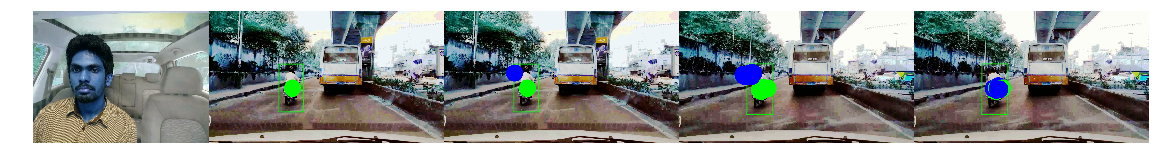

(270, 2280, 3)


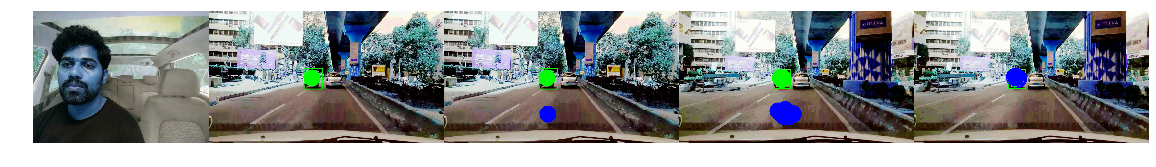

(270, 2280, 3)


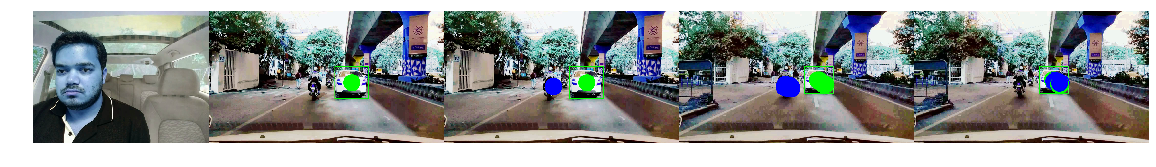

KeyboardInterrupt: 

In [38]:
k =0
for j in range(10,100,10):
    k +=1
    image_name = 'qualitative_results'+str(k)+'.png'
    for i in range(8):
        frame_array = plot_data2(users[i],j+i,model2,50)
        if(i ==0):
            frame_array2 = frame_array
        else:
            frame_array2 = np.concatenate((frame_array2, frame_array), axis =0)
    cv2.imwrite(image_name, frame_array2)

In [19]:
#cv2.imwrite('qualitative_results7.png', frame_array2)

## Gaze Predicition for Videos

In [46]:
def get_features_videos(fmodel, left_eye_data, right_eye_data, face_features_data, Ydata):
    
    video_features = []
    ground_truth = []
    
    for i in range(len(left_eye_data)):
        print(i)
        temp = []; gt = []
        for j in range(len(left_eye_data[i])):
            
            le = left_eye_data[i,j].reshape((1, 36,60,3))
            ff = np.concatenate((face_features_data[i,j,1:8].reshape((1,7)), face_features_data[i,j,8:15].reshape((1,7))), axis=1).astype(int)
            features = fmodel.predict([le, ff])
            temp.append(features)
            #print(features.shape)
            gt.append(Ydata[i,j])
        video_features.append(temp)
        ground_truth.append(gt)
        
    return np.array(video_features), np.array(ground_truth)
    
    

In [47]:
from keras.models import Model
fmodel = Model(inputs=model2.inputs, outputs=model2.layers[-2].output)
video_features, ground_truth = get_features_videos(fmodel, left_eye_data, right_eye_data, face_features_data, Ydata)
print(video_features.shape, ground_truth.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
(2013, 50, 1, 512) (2013, 50, 2)


### Divide data into train val and test

In [48]:
from random import shuffle

video_idx = np.arange(0,len(ground_truth))
shuffle(video_idx)

video_train_len = int((90 * len(ground_truth))/100)

video_train_idx = video_idx[:video_train_len]
#val_idx = idx[train_len:len(Ydata2)]
video_val_idx = video_idx[video_train_len:video_train_len+int((len(ground_truth)-video_train_len)/2)]
video_test_idx = video_idx[video_train_len+int((len(ground_truth)-video_train_len)/2):len(ground_truth)]

print(len(video_train_idx),len(video_val_idx), len(video_test_idx))

1811 101 101


In [49]:
train_data, ytrain = video_features[video_train_idx], ground_truth[video_train_idx]
val_data, yval = video_features[video_val_idx], ground_truth[video_val_idx]
test_data, ytest = video_features[video_test_idx], ground_truth[video_test_idx]

print(train_data.shape, ytrain.shape, val_data.shape, yval.shape, test_data.shape, ytest.shape)

(1811, 50, 1, 512) (1811, 50, 2) (101, 50, 1, 512) (101, 50, 2) (101, 50, 1, 512) (101, 50, 2)


In [50]:
train_data = train_data.reshape((1811,50,512))
val_data = val_data.reshape((101,50,512))
test_data = test_data.reshape((101,50,512))

### Video prediction

In [80]:
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Bidirectional

vmodel = Sequential()
vmodel.add(Bidirectional(LSTM(output_dim=512, return_sequences=True),input_shape=(50, 512))) 
vmodel.add(TimeDistributed(Dense(2)))
vmodel.add(Activation('linear')) 
print(vmodel.summary())



/home/isha.d/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=512, return_sequences=True)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 50, 1024)          4198400   
_________________________________________________________________
time_distributed_8 (TimeDist (None, 50, 2)             2050      
_________________________________________________________________
activation_8 (Activation)    (None, 50, 2)             0         
Total params: 4,200,450
Trainable params: 4,200,450
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
vmodel.compile(loss='mae', optimizer='adam')

In [93]:
earlystopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 5, patience =10, verbose =0, mode ='auto')

history = vmodel.fit(train_data, ytrain, 
                     epochs=300, batch_size=40, callbacks=[earlystopping], validation_data=(val_data, yval), verbose=1,
                     shuffle= True)
print(history.history.keys())

Train on 1811 samples, validate on 101 samples
Epoch 1/300
1811/1811 [==============================] - 6s 3ms/step - loss: 185.8924 - val_loss: 186.0663
Epoch 2/300
1811/1811 [==============================] - 6s 3ms/step - loss: 185.7013 - val_loss: 185.8224
Epoch 3/300
1811/1811 [==============================] - 5s 3ms/step - loss: 185.4917 - val_loss: 185.7086
Epoch 4/300
1811/1811 [==============================] - 5s 3ms/step - loss: 185.4148 - val_loss: 185.4950
Epoch 5/300
1811/1811 [==============================] - 5s 3ms/step - loss: 185.3695 - val_loss: 185.3778
Epoch 6/300
1811/1811 [==============================] - 5s 3ms/step - loss: 185.0961 - val_loss: 185.1200
Epoch 7/300
1811/1811 [==============================] - 5s 3ms/step - loss: 185.0306 - val_loss: 185.1261
Epoch 8/300
1811/1811 [==============================] - 6s 3ms/step - loss: 184.8971 - val_loss: 184.8718
Epoch 9/300
1811/1811 [==============================] - 5s 3ms/step - loss: 184.9374 - val_loss:

dict_keys(['val_loss', 'loss'])


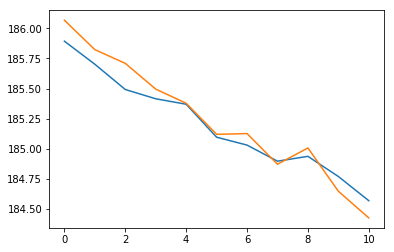

In [94]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [95]:
train_score_video = vmodel.evaluate(train_data, ytrain)
val_score_video = vmodel.evaluate(val_data, yval)
test_score_video = vmodel.evaluate(test_data, yval)
print(train_score_video, val_score_video, test_score_video)
        

101/101 [==============================] - 0s 961us/step
184.36533435334954 184.4264506727162 194.07164077003404


In [96]:
ypred_video = vmodel.predict(test_data)
print(ypred_video[0], ytest[0])

[[ 902.06854  589.56384]
 [ 988.4404   645.7861 ]
 [1001.6788   654.4033 ]
 [1003.5025   655.59045]
 [1003.1956   656.2932 ]
 [1003.7835   655.7734 ]
 [1003.78796  655.7763 ]
 [1003.78864  655.7767 ]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.64166  655.678  ]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7884   655.77655]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1003.7887   655.77673]
 [1002.55884  656.97876]
 [1003.78864  655.77673]
 [1002.5588   656.9787 ]
 [1002.55835  656.9784 ]
 [1002.5552   656.97644]
 [1002.5319   656.9616 ]
 [1002.36615  656.85626]
 [1001.40594  656.2461 ]
 [1000.2475   653.5266 ]
 [ 998.86664  652.64905]
 [ 998.59454  652.47626]
 [ 998.5549   652.45105]


In [91]:
from sklearn.metrics import mean_absolute_error
def compute_mae_error(y1, y2):
    
    s =0
    for i in range(len(y1)):
        for j in range(len(y1[i])):
            s += mean_absolute_error(y1[i,j],y2[i,j])
            print(mean_absolute_error(y1[i,j],y2[i,j]))
    print(s/(101*50))

In [92]:
compute_mae_error(ypred_video, ytest)

491.4995422363281
562.3859558105469
573.2507629394531
574.7476196289062
574.9506530761719
574.9781799316406
574.9819030761719
574.9823913574219
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.8606567382812
574.9824523925781
574.9824523925781
574.9822082519531
574.9824523925781
574.9824523925781
574.9824523925781
574.9824523925781
574.982421875
574.9824523925781
574.9824523925781
574.982421875
574.9833374023438
574.9829711914062
574.9794616699219
574.9615783691406
574.8261413574219
574.0472106933594
572.1098022460938
570.9895935058594
570.7689514160156
570.7367248535156
570.2531127929688
570.8456420898438
570.7590942382812
571.7133483886719
573.6851501464844
574.7178039550781
574.6815185546875
572.8323669433594
560.9041137695312
492.0195007324219
229.30941772460938
210.9710693359375
204.18115234375
203.86566162109375
203.32290649414062
203.3170471191406

232.29934692382812
234.79837036132812
239.36260986328125
238.79837036132812
235.79837036132812
238.29934692382812
238.29837036132812
238.29837036132812
235.29934692382812
238.29934692382812
233.79934692382812
235.79934692382812
234.79837036132812
235.29837036132812
232.79934692382812
236.36260986328125
232.79837036132812
235.29837036132812
230.29837036132812
233.79934692382812
230.29837036132812
231.29931640625
232.79934692382812
232.29837036132812
233.79934692382812
235.29867553710938
233.79934692382812
239.29861450195312
237.30059814453125
239.07467651367188
246.02764892578125
248.16433715820312
252.76837158203125
263.2317810058594
336.1938171386719
201.7022705078125
129.88772583007812
113.77096557617188
114.13943481445312
110.06906127929688
114.80630493164062
110.80032348632812
109.79946899414062
112.29971313476562
106.30014038085938
111.4771728515625
105.30859375
108.09197998046875
102.39822387695312
104.09225463867188
97.30044555664062
96.30105590820312
99.5543212890625
95.5871887

81.31613159179688
85.92953491210938
80.31613159179688
79.31613159179688
82.31613159179688
75.31613159179688
79.31613159179688
74.81613159179688
79.81613159179688
75.31613159179688
69.89871215820312
75.96322631835938
73.00802612304688
73.61959838867188
76.45819091796875
79.31613159179688
70.81613159179688
76.81613159179688
70.81613159179688
75.81613159179688
75.27322387695312
76.31613159179688
71.11892700195312
68.31619262695312
68.81619262695312
65.31631469726562
64.81631469726562
58.817169189453125
62.82354736328125
60.986541748046875
61.4876708984375
61.5599365234375
58.087005615234375
61.44744873046875
61.24493408203125
62.90460205078125
125.19479370117188
263.87261962890625
201.40963745117188
210.1995849609375
229.987548828125
235.55526733398438
249.56326293945312
245.56143188476562
246.06170654296875
248.04415893554688
252.45077514648438
260.5750427246094
254.17562866210938
251.56527709960938
250.54818725585938
252.54583740234375
260.0452575683594
261.04547119140625
261.0454711914

98.31613159179688
96.81613159179688
93.81613159179688
93.81613159179688
92.81613159179688
90.81613159179688
88.81613159179688
87.31613159179688
84.31613159179688
82.31613159179688
83.81613159179688
80.31613159179688
82.81613159179688
79.79934692382812
80.81613159179688
78.31613159179688
78.31631469726562
78.31698608398438
77.32241821289062
76.86306762695312
77.162109375
84.23178100585938
153.69479370117188
262.8084716796875
201.6971435546875
212.00759887695312
231.92449951171875
237.48281860351562
251.49069213867188
247.4918212890625
246.33999633789062
248.06451416015625
252.56414794921875
261.0620422363281
255.04629516601562
252.56204223632812
251.56411743164062
253.56448364257812
261.0645446777344
262.06451416015625
262.0645446777344
260.17071533203125
259.0642395019531
253.56253051757812
241.62454223632812
246.56259155273438
230.55776977539062
233.54611206054688
230.06198120117188
223.0458984375
224.4422607421875
226.04611206054688
226.06173706054688
236.54434204101562
235.431427001

139.596923828125
138.10934448242188
139.27267456054688
137.18478393554688
169.93685913085938
246.50048828125
320.8868713378906
332.7516784667969
338.7485656738281
340.4516296386719
344.4790954589844
346.48284912109375
350.98333740234375
353.4833679199219
360.9833984375
362.9833984375
366.9833984375
367.9833984375
371.9833984375
373.4833984375
377.9824523925781
378.9824523925781
383.4833984375
384.9833984375
386.4833984375
393.9833984375
395.9833984375
400.4833984375
401.9833984375
405.9824523925781
406.4833984375
409.9833984375
410.9824523925781
412.9824523925781
416.9824523925781
415.4824523925781
420.9824523925781
422.4824523925781
424.4824523925781
429.4824523925781
430.4824523925781
434.9824523925781
436.4824523925781
440.9824523925781
441.9824523925781
445.9824523925781
447.482421875
452.4823913574219
454.48193359375
459.4784240722656
461.9521484375
466.7582092285156
466.8287353515625
460.95294189453125
394.7569580078125
136.523193359375
63.276214599609375
51.582550048828125
50.94

238.29837036132812
238.29837036132812
235.29837036132812
238.29837036132812
233.79837036132812
235.79837036132812
234.79837036132812
235.29837036132812
232.79837036132812
235.29837036132812
232.79837036132812
235.29837036132812
230.29837036132812
233.79837036132812
230.29837036132812
231.29934692382812
232.79934692382812
232.29934692382812
233.79837036132812
235.29837036132812
233.79840087890625
239.29934692382812
237.29989624023438
238.80349731445312
242.33065795898438
247.53109741210938
252.0084228515625
263.2317810058594
336.1938171386719
484.4114074707031
469.9710998535156
467.68115234375
468.86566162109375
464.8229064941406
464.8170471191406
462.3162841796875
459.81610107421875
459.8161315917969
457.3161315917969
456.8161315917969
456.3161315917969
455.3161315917969
452.8161315917969
452.3161315917969
452.3161315917969
451.8161315917969
451.3161315917969
452.8161315917969
448.8161315917969
451.3161315917969
447.3161315917969
447.8161315917969
447.8161315917969
446.3161315917969
44

108.58349609375
103.04037475585938
107.33120727539062
102.30380249023438
94.7999267578125
94.79937744140625
93.79885864257812
91.29837036132812
95.79837036132812
90.29837036132812
87.79837036132812
91.29934692382812
93.79934692382812
92.79837036132812
82.79904174804688
91.29855346679688
82.79934692382812
85.29934692382812
80.79934692382812
79.79934692382812
74.79837036132812
78.79934692382812
76.79934692382812
73.29837036132812
78.29934692382812
84.29837036132812
73.79934692382812
80.79837036132812
75.79837036132812
73.79934692382812
75.7991943359375
68.88717651367188
67.29934692382812
69.79861450195312
64.29861450195312
66.29910278320312
65.79840087890625
65.7994384765625
50.799224853515625
59.299560546875
51.300201416015625
50.3057861328125
46.327484130859375
43.407318115234375
48.555572509765625
49.920745849609375
68.93893432617188
133.404296875
259.5142822265625
275.3592529296875
272.22296142578125
258.0336608886719
257.57586669921875
242.08160400390625
245.01535034179688
228.58245

425.6044006347656
418.6944885253906
411.3559875488281
400.87823486328125
380.8812561035156
375.38165283203125
361.2535400390625
350.2214660644531
339.9735107421875
330.9626770019531
309.8983459472656
301.8968811035156
296.8860778808594
289.8078308105469
284.7952575683594
279.3157653808594
269.3468017578125
253.21566772460938
240.99008178710938
230.9036865234375
219.81478881835938
211.30929565429688
203.85769653320312
189.41680908203125
182.55453491210938
167.55453491210938
153.698486328125
139.55453491210938
138.55453491210938
126.05453491210938
110.55361938476562
101.58645629882812
94.58712768554688
92.11721801757812
85.11721801757812
77.61727905273438
66.31890869140625
59.8193359375
65.32821655273438
72.82284545898438
80.78237915039062
89.98483276367188
96.82522583007812
100.11355590820312
281.91143798828125
262.4710693359375
259.18115234375
254.36569213867188
253.82293701171875
249.31710815429688
248.31649780273438
243.81753540039062
243.32205200195312
237.82205200195312
237.8575744

355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.3161315917969
355.316162109375
355.31634521484375
355.3172302246094
355.3241271972656
355.3646240234375
355.6731262207031
357.90460205078125
371.9949035644531
189.37265014648438
123.49673461914062
120.07366943359375
123.92340087890625
124.05517578125
125.59237670898438
125.56436157226562
128.06417846679688
130.56283569335938
134.55471801757812
132.4998779296875
135.11904907226562
134.44522094726562
137.15304565429688
140.95755004882812
143.04861450195312
146.06210327148438
151.06414794921875
153.56207275390625
158.34927368164062
160.06387329101562
163.05978393554688
171.03036499023438
170.85525512695312
176.45095825195312
178.01010131835938
179.2838134765625
180.8125
185.29547119140625
183.551025390625
189.0384521484375
193.48992919921875
196.82217407226562
193.93048095703125
199.32186889648438
201.850189

57.639556884765625
66.13955688476562
59.639556884765625
67.13925170898438
62.639251708984375
69.13925170898438
65.63925170898438
73.13925170898438
70.13925170898438
70.63925170898438
74.63925170898438
69.63925170898438
77.13848876953125
73.13848876953125
77.63848876953125
73.13848876953125
78.13848876953125
77.63848876953125
80.13848876953125
76.63848876953125
82.13848876953125
79.13848876953125
81.63125610351562
80.63125610351562
81.57876586914062
82.07876586914062
85.07876586914062
82.34738159179688
83.84738159179688
81.84738159179688
83.34808349609375
82.84735107421875
83.84732055664062
84.84686279296875
85.84335327148438
85.81710815429688
87.1231689453125
86.97164916992188
77.59579467773438
27.4632568359375
246.49954223632812
320.8859558105469
332.7507629394531
338.74761962890625
340.4507141113281
344.4781799316406
346.4819030761719
350.9823913574219
353.4824523925781
360.9824523925781
362.9824523925781
366.9824523925781
367.9833984375
371.9833984375
373.4833984375
377.9833984375
3